# [WSI] Ćwiczenie nr 2
### Algorytmy ewolucyjne

Mikołaj Wewiór 318407


In [18]:
import matplotlib.pyplot as plt
import numpy as np

RAST_BOUNDS = [-5.12, 5.12]
GRIE_BOUNDS = [-50, 50]
DROP_BOUNDS = [-5.12, 5.12]

DIMENSIONS = 2
STEPS = 400

In [19]:
class Function:

    def __init__(self, bounds, dimensions, beta, initial_position, global_optimum=0.0):
        self._name = None
        self._bounds = bounds
        self._dimensions = dimensions
        self._beta = beta
        self._current_position = initial_position
        self._global_optimum = global_optimum


    def name(self):
        return self._name


    def d(self):
        return self._dimensions


    def bounds(self):
        return self._bounds


    def position(self):
        return self._current_position


    def set_position(self, new_position):
        self._current_position = new_position


    def beta(self):
        return self._beta


    def set_beta(self, new_beta):
        self._beta = new_beta


    def global_optimum(self):
        return self._global_optimum


    # def grad(self, x_vector, i):
    #     return None


    def update_position(self):
        pass
        # TODO

        # min_bound = self._bounds[0]
        # max_bound = self._bounds[1]
        # d = self.d()
        # x = copy.deepcopy(self.position())

        # for i in range(d):
        #     upd = self.beta()*self.grad(x, i)
        #     x[i] = x[i] - upd

        #     while x[i] > max_bound:
        #         diff = x[i] - max_bound
        #         x[i] = min_bound + diff
        #     while x[i] < min_bound:
        #         diff = x[i] - min_bound
        #         x[i] = max_bound + diff

        # self.set_position(x)
        # return x


In [20]:
class Rastrigin(Function):

    def __init__(self, bounds, dimensions, beta, initial_position):
        super().__init__(bounds, dimensions, beta, initial_position)
        self._name = "Rastrigin"

    # TODO

    def q(self, x_vector):
        d = self.d()
        partial_cost = lambda x: x**2 - 10*np.cos(2*np.pi*x)

        cost = 10*d
        for i in range(d) : cost += partial_cost(x_vector[i])

        return cost


    # def grad(self, x_vector, i):
    #     x = x_vector[i]
    #     gradient = 2*x +20*np.pi*np.sin(2*np.pi*x)
    #     return gradient


In [21]:
class Griewank(Function):

    def __init__(self, bounds, dimensions, beta, initial_position):
        super().__init__(bounds, dimensions, beta, initial_position)
        self._name = "Griewank"

    # TODO

    def q(self, x_vector):
        d = self.d()

        SUM = 0
        for i in range(d):
            SUM += x_vector[i]**2
        SUM = SUM / 4000

        PI = 1
        for i in range(d):
            PI = PI*np.cos(
                x_vector[i]*np.sqrt(i+1)/(i+1)
            )

        return SUM - PI + 1


    # def grad(self, x_vector, i):
    #     x = x_vector
    #     PI_rest = 1
    #     for j in range(self.d()):
    #         if j != i:
    #             PI_rest = PI_rest*np.cos(
    #                 x[j]*np.sqrt(j+1)/(j+1)
    #             )

    #     return x[i]/2000 + np.sin(x[i]*np.sqrt(i+1)/(i+1)) * PI_rest*np.sqrt(i+1)/(i+1)


In [22]:
class DropWave(Function):
    def __init__(self, bounds, dimensions, beta, initial_position, global_optimum=0):
        super().__init__(bounds, dimensions, beta, initial_position, global_optimum)
        self._name = "Griewank"

    # TODO

    def q(self, x_vector):
        d = self.d()

        square = 0
        for i in range(d):
            square += x_vector[i]**2


        nominator = 1 + np.cos(12*np.sqrt(square))
        denominator = 0.5 * square + 2

        return nominator/denominator


In [23]:
class Evolution:
    def __init__(self) -> None:
        # inicjalizacja populacji
        # wartość funkcji dopasowania dla osobnika
        #   wybór osobników do krzyżowania
        #   krzyżowanie
        #   mutacja wybranych
        #   obliczenie wartości funkcji dopasowania dla każdego
        #   wybór nowej populacji

        pass





In [24]:
class Plotter:
    def __init__(self, dimensions, steps, function, bounds=None):
        self._dimensions = dimensions
        self._steps = steps
        self._function = function
        self._bounds = bounds


    def funciton(self):
        return self._function


    def name(self):
        return self.funciton().name()


    def d(self):
        return self._dimensions


    def steps(self):
        return self._steps


    def bounds(self):
        if self._bounds != None:
            return self._bounds
        return self.funciton().bounds()


    def q(self, x_vector):
        return self.funciton().q(x_vector)


    def plot_route(self, route_x, route_y):
        plt.scatter(route_x[1:-1], route_y[1:-1])
        plt.plot(route_x, route_y)
        plt.scatter(route_x[0], route_y[0], color="white")
        plt.scatter(route_x[-1], route_y[-1], color="red")


    def plot(self, route_x=None, route_y=None):
        step = self.steps()
        bounds = self.bounds()
        diff = bounds[1] - bounds[0]
        Z = np.zeros((step+1, step+1))
        for i in range(step+1):
            y = bounds[0] + i*diff/step
            for j in range(step+1):
                x = bounds[0] + j*diff/step
                Z[i][j] = self.q([x, y])

        x = np.linspace(bounds[0], bounds[1], step+1)
        y = np.linspace(bounds[0], bounds[1], step+1)

        X, Y = np.meshgrid(x, y)

        plt.figure()
        plt.ion()

        contour = plt.contourf(X, Y, Z, cmap="plasma", levels=100)
        cbar = plt.colorbar(contour)
        cbar.set_label("Function value")

        plt.grid(True)
        plt.xlabel("x1")
        plt.ylabel("x2", rotation=0)

        if not (route_x == None or route_y == None):
            self.plot_route(route_x, route_y)

        plt.show()



In [25]:
class Experiment:
    def __init__(self, function, iterations: int, step: float, experiment_domain: float, epsilon: float, show: bool):
        self._function = function
        self._iterations = iterations
        self._step = step
        self._domain = experiment_domain
        self._epsilon = epsilon
        self._show = show


    def test_function(self):
        return self._function


    def iterations(self):
        return self._iterations


    def step(self):
        return self._step


    def domain(self):
        return self._domain


    def epsilon(self):
        return self._epsilon


    def show_flag(self):
        return self._show


    def specify_function(self, function, x=None,  beta=None, MSE=False):
        if x != None:
            function.set_position(x)
        if beta != None:
            function.set_beta(beta)


    def plot(self, data, xlabel, scatter=False):
        X = data[0]
        Y = data[1::]
        plt.figure()
        plt.grid(True)
        for y in Y: plt.plot(X, y)
        if scatter:
            for y in Y: plt.scatter(X, y, c='#ff7f0e')
        plt.ylabel("Error")
        plt.xlabel(xlabel)
        plt.show()


    def beta_experiment(self, init_points, MSE=False):
        beta_and_qs = []
        for _ in range(len(init_points)+1): beta_and_qs.append([])

        int_range = int(self.domain() / self.step())

        for i in range(int_range+1):

            beta = (i+1)*self.step()
            beta_and_qs[0].append(beta)

            for t in range(len(init_points)):
                test_func = self.test_function()
                self.specify_function(test_func, init_points[t], beta)

                test = Test(self.iterations(), test_func, self.epsilon())
                route_x, route_y, route_q = test.do_test()

                if MSE:
                    error = route_q[-1]**2
                else:
                    error = abs(route_q[-1])

                beta_and_qs[t+1].append(error)

        if self.show_flag():
            self.plot(beta_and_qs, xlabel="Beta")

        return beta_and_qs


    def initial_position_experiment(self, inits_count, beta, distribution_bound, MSE=False):
        xy_results = [[], [], []]
        # bound = self.test_function().bounds()[1]

        for _ in range(inits_count):

            # x1 = np.random.uniform(-bound, bound)
            # x2 = np.random.uniform(-bound, bound)
            # x2 = np.random.normal(0, 3.0, 1)
            # x1 = np.random.normal(0, 3.0, 1)
            X = get_truncated_normal(0, 4, -distribution_bound, distribution_bound)
            x1 = X.rvs()
            x2 = X.rvs()
            position = [x1, x2]
            norm = np.sqrt(x1**2 + x2**2)

            xy_results[0].append(position)
            xy_results[1].append(norm)

            test_func = self.test_function()
            self.specify_function(test_func, position, beta)

            test = Test(self.iterations(), test_func, self.epsilon())
            route_x, route_y, route_q = test.do_test()

            if MSE:
                error = route_q[-1]**2
            else:
                error = abs(route_q[-1])

            xy_results[2].append(error)

        zipped = list(zip(xy_results[1], xy_results[2]))
        dist_q = sorted(zipped, key = lambda x: x[0])
        xs_and_qs = [
            [i for i, j in dist_q],
            [j for i, j in dist_q]
        ]

        if self.show_flag():
            self.plot(xs_and_qs, xlabel="Distance from global optimum", scatter=True)

        return xs_and_qs



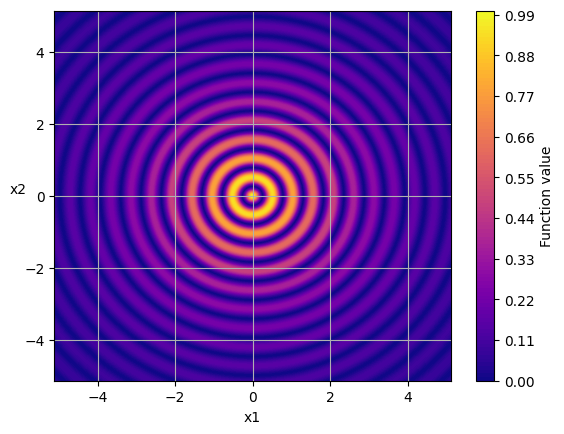

In [26]:
DropwavePlot = Plotter(DIMENSIONS, STEPS, DropWave(DROP_BOUNDS, 2, 1, [0,0]))
DropwavePlot.plot()